In [155]:
import pandas as pd
import numpy as np       #载入必要的库
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
data_phoenix = pd.read_csv('./Phoenix_new.csv', encoding='ISO-8859-1')
data_calgary = pd.read_csv('./Calgary_new.csv', encoding='ISO-8859-1')
data_newyork = pd.read_csv('./NewYork_new.csv', encoding='ISO-8859-1')
data_singapore= pd.read_csv('./Singapore_new.csv', encoding='ISO-8859-1')
print(data_phoenix.shape)
print(data_calgary.shape)
print(data_newyork.shape)
print(data_singapore.shape)
data_phoenix

(7247, 6)
(3013, 6)
(56252, 6)
(33712, 6)


,VenueId,Longitude,Dimension,Category,City,CountryCode
0,413ba880f964a520011c1fe3,33.494307,-112.059703,Rock Club,Phoenix,US
1,413ba880f964a5200c1c1fe3,33.429753,-111.944480,Bar,Phoenix,US
2,413ba880f964a5200e1b1fe3,33.509136,-112.029283,Resort,Phoenix,US
3,413ba880f964a520111c1fe3,33.641348,-112.117624,Pizza Place,Phoenix,US
4,413ba880f964a520131c1fe3,33.538693,-112.064192,Pizza Place,Phoenix,US
...,...,...,...,...,...,...
7242,52269e1b11d22a489e0dc3d7,33.495389,-112.021272,Coffee Shop,Phoenix,US
7243,5229387a11d2ae7da721757d,33.557019,-112.186848,Residential Building (Apartment / Condo),Phoenix,US
7244,522a02b1498e3faacde032ce,33.448889,-112.078332,Courthouse,Phoenix,US
7245,52348b3a11d21bede302d8ad,33.641171,-112.053730,Housing Development,Phoenix,US


In [157]:
data_phoenix_category = data_phoenix.groupby('Category').size().sort_values(ascending=False)
data_calgary_category = data_calgary.groupby('Category').size().sort_values(ascending=False)
data_newyork_category = data_newyork.groupby('Category').size().sort_values(ascending=False)
data_singapore_category = data_singapore.groupby('Category').size().sort_values(ascending=False)

In [158]:
data= pd.DataFrame()
data = data.append(data_phoenix_category,ignore_index= True)
data = data.append(data_calgary_category,ignore_index= True)
data = data.append(data_newyork_category,ignore_index= True)
data = data.append(data_singapore_category,ignore_index= True)
data
data_phoenix_category

Category
Home (private)               344
Fast Food Restaurant         232
Mexican Restaurant           225
Office                       221
Gas Station / Garage         211
                            ... 
South American Restaurant      1
Kids Store                     1
Stadium                        1
Bike Rental / Bike Share       1
Ethiopian Restaurant           1
Length: 344, dtype: int64

In [159]:
data=data.fillna(0)
data.astype(int)

,Accessories Store,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Terminal,Airport Tram,American Restaurant,Animal Shelter,...,Trails,Turkish Restaurant,Vineyard,Volleyball Court,Well,Yogurt,Boarding House,College Hockey Rink,College Tennis Court,Cricket Ground
0,11,1,16,3,111,8,56,7,159,3,...,0,0,0,0,0,0,0,0,0,0
1,6,0,11,0,23,1,7,0,47,0,...,0,0,0,0,0,0,0,0,0,0
2,91,20,81,2,232,36,135,20,712,17,...,1,20,5,1,2,4,0,0,0,0
3,59,3,43,3,65,10,58,5,149,8,...,0,2,5,2,0,0,4,1,1,2


In [160]:
data.index = pd.Series(['Phoenix', 'Calgary','NewYork','Singapore'])
data

,Accessories Store,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Terminal,Airport Tram,American Restaurant,Animal Shelter,...,Trails,Turkish Restaurant,Vineyard,Volleyball Court,Well,Yogurt,Boarding House,College Hockey Rink,College Tennis Court,Cricket Ground
Phoenix,11.0,1.0,16.0,3.0,111.0,8.0,56.0,7.0,159.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Calgary,6.0,0.0,11.0,0.0,23.0,1.0,7.0,0.0,47.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NewYork,91.0,20.0,81.0,2.0,232.0,36.0,135.0,20.0,712.0,17.0,...,1.0,20.0,5.0,1.0,2.0,4.0,0.0,0.0,0.0,0.0
Singapore,59.0,3.0,43.0,3.0,65.0,10.0,58.0,5.0,149.0,8.0,...,0.0,2.0,5.0,2.0,0.0,0.0,4.0,1.0,1.0,2.0


In [161]:
data = data.stack().unstack(0)
data

,Phoenix,Calgary,NewYork,Singapore
Accessories Store,11.0,6.0,91.0,59.0
African Restaurant,1.0,0.0,20.0,3.0
Airport,16.0,11.0,81.0,43.0
Airport Food Court,3.0,0.0,2.0,3.0
Airport Gate,111.0,23.0,232.0,65.0
...,...,...,...,...
Yogurt,0.0,0.0,4.0,0.0
Boarding House,0.0,0.0,0.0,4.0
College Hockey Rink,0.0,0.0,0.0,1.0
College Tennis Court,0.0,0.0,0.0,1.0


In [162]:
data['Phoenix'] = data['Phoenix'].div(data_phoenix.shape[0])
data['Calgary'] = data['Calgary'].div(data_calgary.shape[0])
data['NewYork'] = data['NewYork'].div(data_newyork.shape[0])
data['Singapore'] = data['Singapore'].div(data_singapore.shape[0])
data = data.drop(index=['Home (private)'])
data

,Phoenix,Calgary,NewYork,Singapore
Accessories Store,0.001518,0.001991,0.001618,0.001750
African Restaurant,0.000138,0.000000,0.000356,0.000089
Airport,0.002208,0.003651,0.001440,0.001276
Airport Food Court,0.000414,0.000000,0.000036,0.000089
Airport Gate,0.015317,0.007634,0.004124,0.001928
...,...,...,...,...
Yogurt,0.000000,0.000000,0.000071,0.000000
Boarding House,0.000000,0.000000,0.000000,0.000119
College Hockey Rink,0.000000,0.000000,0.000000,0.000030
College Tennis Court,0.000000,0.000000,0.000000,0.000030


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0, flags=flags)


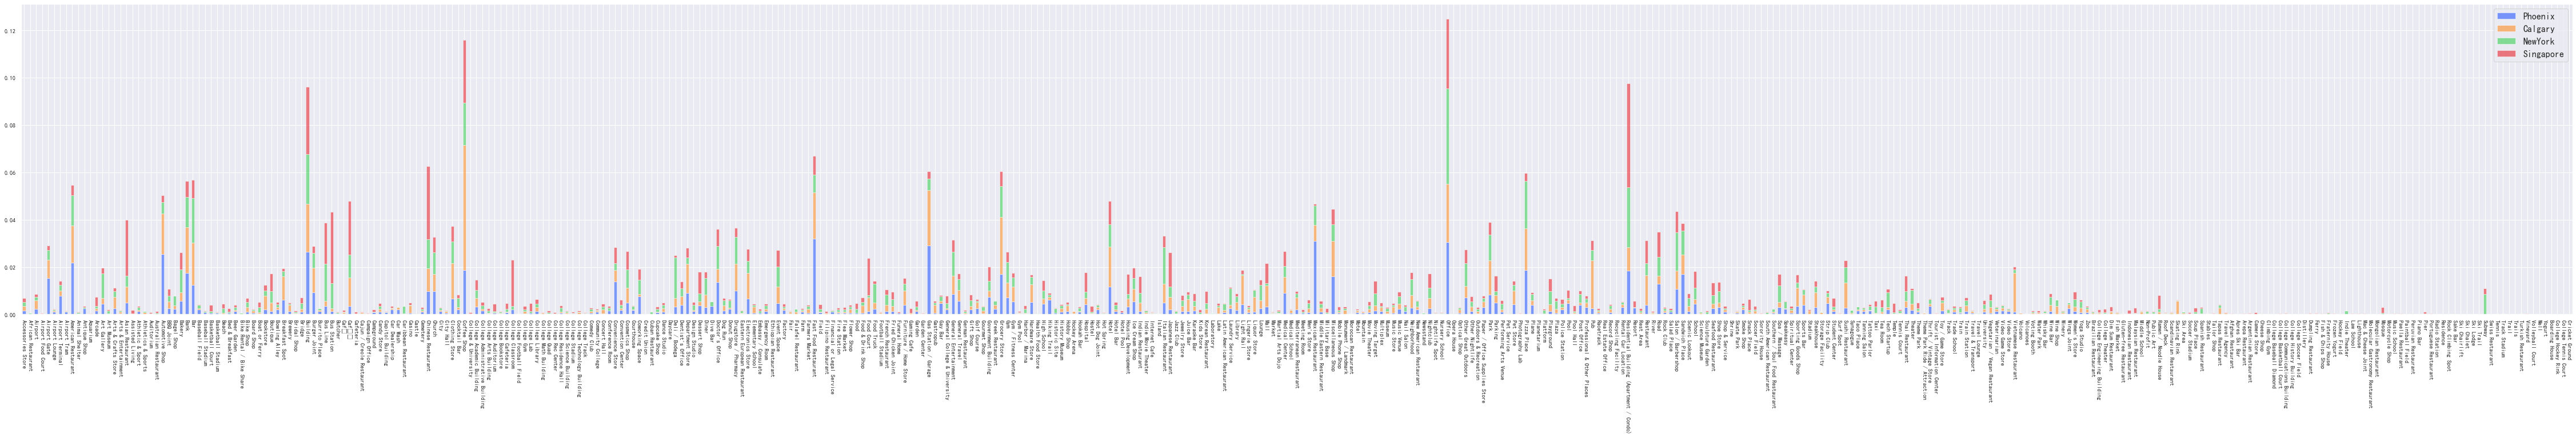

In [163]:
plt.rcParams['figure.figsize'] = (80, 10.0)   #调整图片大小

import seaborn as sns
from matplotlib.font_manager import FontProperties   #显示中文，并指定字体
myfont=FontProperties(fname=r'C:/Windows/Fonts/simhei.ttf',size=14)
sns.set(font=myfont.get_name())
plt.rcParams['axes.unicode_minus']=False      #显示负号

sns.set_palette(sns.color_palette('bright'))  #设置调色板
#pal_style = ['deep', 'muted', 'pastel', 'bright', 'dark','colorblind']

data.plot.bar(stacked=True, alpha=0.5)      #绘制堆积柱状图

plt.xticks(fontsize=10, rotation=270)    #设置x和y轴刻度值的字体大小;rotation规定水平排列刻度文字。
plt.yticks(fontsize=10)    #设置y轴刻度值的字体大小

plt.legend(fontsize=16)    #设置legend刻度值的字体大小

#plt.yticks(np.arange(0, 251, 50)) #设置y轴标签

plt.show()